In [1]:
#%%
"""
Created on Jan 20 2019
Euler discretization of the GBM
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] =S_0

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        S2[:,i+1] = S2[:,i] * np.exp((r - 0.5*sigma**2.0) *dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S1":S1,"S2":S2}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 25
    T = 1
    r = 0.06
    sigma = 0.3
    S_0 = 50

    # Simulated paths
    Paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    S1 = Paths["S1"]
    S2 = Paths["S2"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(S1),'k')
    plt.plot(timeGrid, np.transpose(S2),'--r')
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

    # Weak and strong convergence
    NoOfStepsV = range(1,500,1)
    NoOfPaths = 250
    errorWeak = np.zeros([len(NoOfStepsV),1])
    errorStrong = np.zeros([len(NoOfStepsV),1])
    dtV = np.zeros([len(NoOfStepsV),1])
    for idx, NoOfSteps in enumerate(NoOfStepsV):
        Paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
        # Get the paths at T
        S1_atT = Paths["S1"][:,-1]
        S2_atT = Paths["S2"][:,-1]

        errorWeak[idx] = np.abs(np.mean(S1_atT)-np.mean(S2_atT))

        errorStrong[idx] = np.mean(np.abs(S1_atT-S2_atT))
        dtV[idx] = T/NoOfSteps

    #print(errorStrong)
    plt.figure(2)
    plt.plot(dtV,errorWeak)
    plt.plot(dtV,errorStrong,'--r')
    plt.grid()
    plt.legend(['weak conv.','strong conv.'])


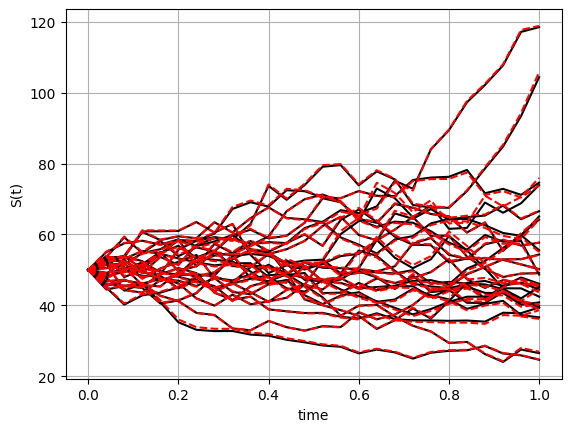

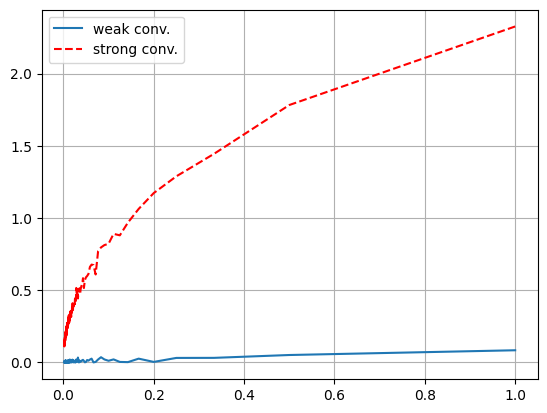

In [3]:
mainCalculation()